In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [10]:
log_files = glob.glob('power_log_20251001_194323.csv')
csv_file = max(log_files, key=lambda x: x)

In [12]:
# Load and preview the data
df = pd.read_csv(csv_file)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['time_seconds'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

print(f"Total data points: {len(df)}")
print(f"Duration: {df['time_seconds'].iloc[-1]:.1f} seconds")
df.head()

Total data points: 41
Duration: 21.4 seconds


,timestamp,usb_in_v,core_v,core_a,core_w,cpu_total,temp,memory,throttled_hex,time_seconds
0,2025-10-01 19:43:23.630,4.99686,0.721782,1.06267,0.767016,1.9,47.2,46.8,0,0.000
1,2025-10-01 19:43:24.164,4.99016,0.792698,1.17876,0.934400,5.2,49.4,46.8,0,0.534
2,2025-10-01 19:43:24.698,4.99552,0.721782,1.01802,0.734789,3.3,48.8,46.8,0,1.068
3,2025-10-01 19:43:25.232,4.99552,0.721782,1.02695,0.741234,8.0,48.3,46.8,0,1.602
4,2025-10-01 19:43:25.766,4.99686,0.721782,1.00016,0.721897,3.7,48.3,46.8,0,2.136


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


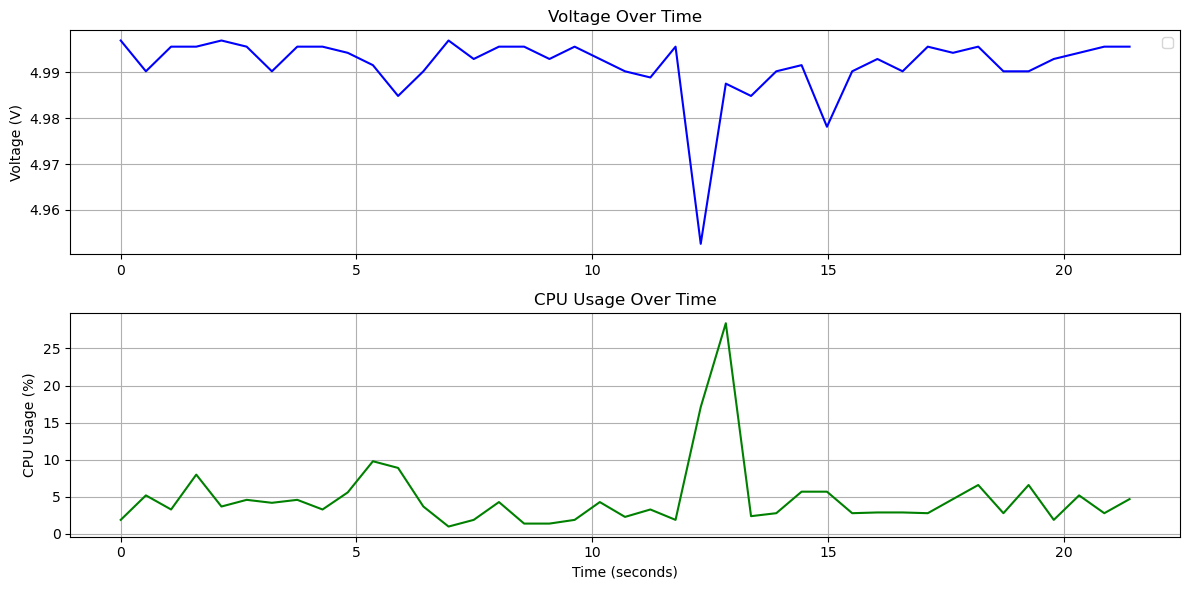

In [15]:
# Quick plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

ax1.plot(df['time_seconds'], df['usb_in_v'], 'b-')
ax1.set_ylabel('Voltage (V)')
ax1.set_title('Voltage Over Time')
ax1.legend()
ax1.grid(True)

ax2.plot(df['time_seconds'], df['cpu_total'], 'g-')
ax2.set_ylabel('CPU Usage (%)')
ax2.set_xlabel('Time (seconds)')
ax2.set_title('CPU Usage Over Time')
ax2.grid(True)

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


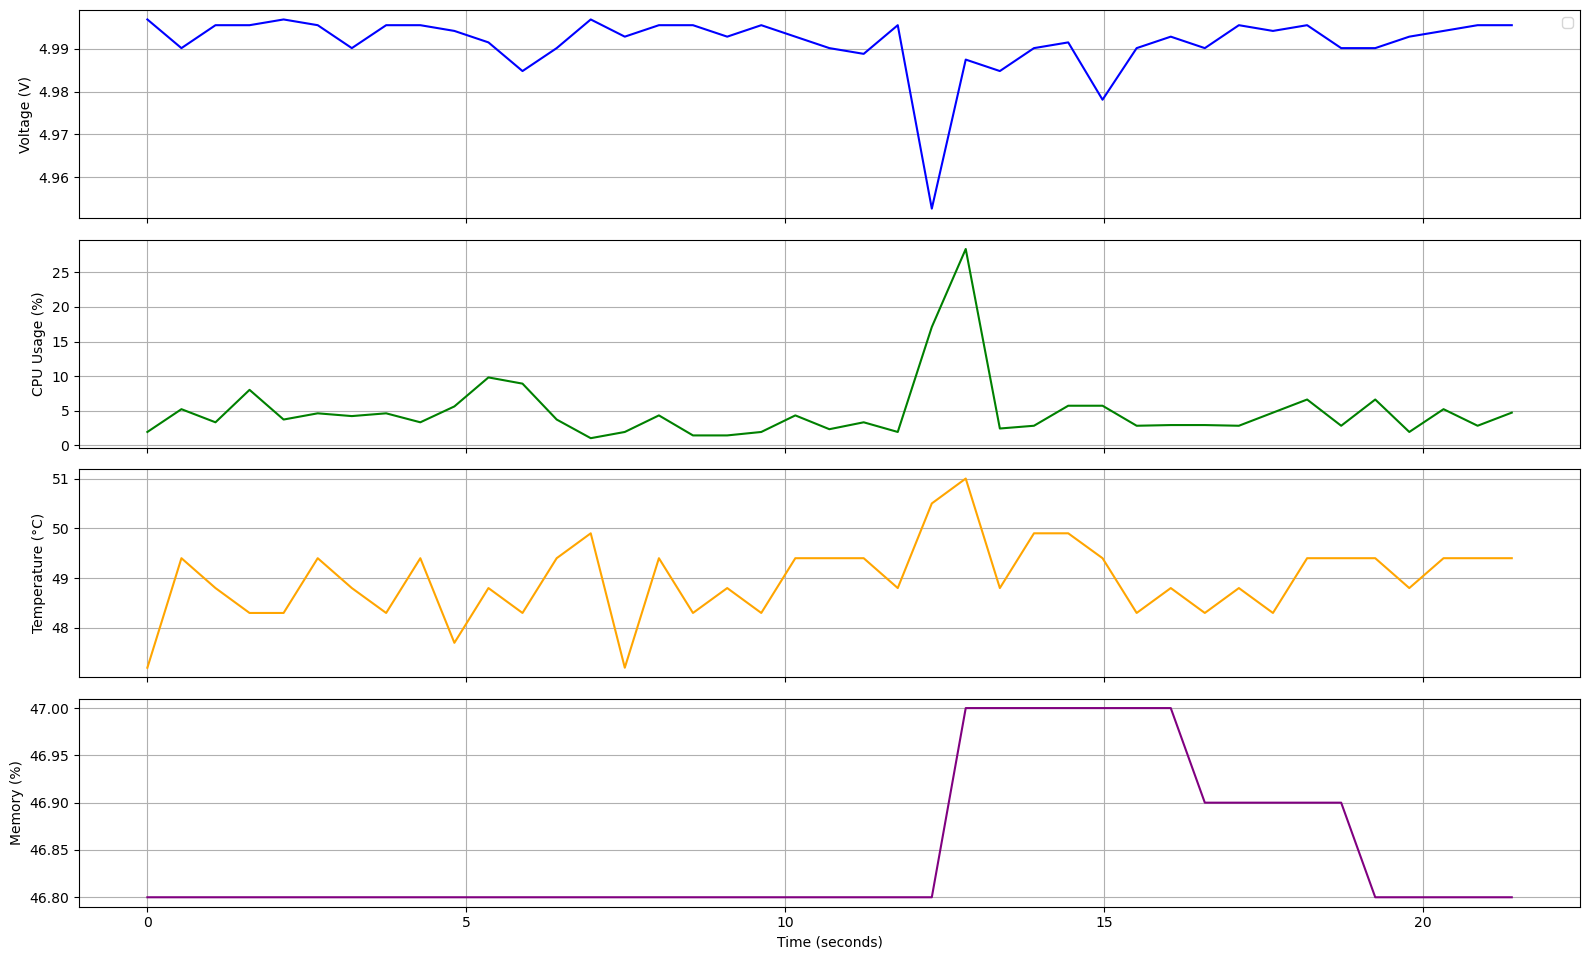

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 10), sharex=True)

# 1. Voltage Plot
ax1.plot(df['time_seconds'], df['usb_in_v'], color='blue')
ax1.set_ylabel('Voltage (V)')
ax1.legend()
ax1.grid(True)

# 2. CPU Usage Plot
ax2.plot(df['time_seconds'], df['cpu_total'], color='green')
ax2.set_ylabel('CPU Usage (%)')
ax2.grid(True)

# 3. Temperature Plot
ax3.plot(df['time_seconds'], df['temp'], color='orange')
ax3.set_ylabel('Temperature (°C)')
ax3.grid(True)

# 4. Memory Usage Plot
ax4.plot(df['time_seconds'], df['memory'], color='purple')
ax4.set_ylabel('Memory (%)')
ax4.set_xlabel('Time (seconds)')
ax4.grid(True)

# Display the plot
plt.tight_layout(rect=[0, 0, 1, 0.97]) # Adjust layout to make room for suptitle
plt.show()
